In [19]:
import pandas as pd
import math
import matplotlib.pyplot as plt

In [20]:
dataset = pd.read_csv('/kaggle/input/behavioral-analytics-and-event-frequency/Behavioral Analytics and Event Frequency.csv')

In [21]:
print("Dataset information :", dataset.info())
print("Dataset column information :", dataset.columns)
dataset.isnull().sum()
dataset.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer_Click_Binary   10000 non-null  int64  
 1   Product_Sales_Count     10000 non-null  int64  
 2   Attempts_Till_Success   10000 non-null  int64  
 3   Calls_Per_Hour          10000 non-null  int64  
 4   Item_Rating             10000 non-null  int64  
 5   Download_Time           10000 non-null  float64
 6   Temperature             10000 non-null  float64
 7   Time_Until_Event        10000 non-null  float64
 8   Insurance_Claims        10000 non-null  float64
 9   Ad_Click_Probability    10000 non-null  float64
 10  Late_Delivery_Count     10000 non-null  int64  
 11  Survey_Satisfaction     10000 non-null  int64  
 12  App_Open_Duration       10000 non-null  float64
 13  Sensor_Deviation        10000 non-null  float64
 14  Refund_Requests         10000 non-null 

(10000, 25)

In [22]:
dataset.describe()

,Customer_Click_Binary,Product_Sales_Count,Attempts_Till_Success,Calls_Per_Hour,Item_Rating,Download_Time,Temperature,Time_Until_Event,Insurance_Claims,Ad_Click_Probability,...,Retries_Before_Success,Waiting_Time,Transaction_Amount,Purchase_Probability,Content_Sharing_Rate,Temperature_Sensor2,Order_Shipping_Days,Rating_Consistency,Clicks_Per_Session,Visits_Until_Purchase
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.407700,12.017800,3.351100,4.980500,2.997100,6.035623,37.018365,1.495617,1977.085099,0.286867,...,5.036200,1.948850,1001.104771,0.713575,0.498390,36.501087,4.028100,0.501829,9.015500,10.071600
std,0.491431,2.211283,2.867761,2.240139,1.406588,2.313439,0.497700,1.511226,1390.601445,0.160700,...,4.511333,1.955194,444.362422,0.159792,0.188246,0.405574,1.997326,0.289403,2.490759,9.662226
min,0.000000,4.000000,1.000000,0.000000,1.000000,2.000146,34.900710,0.000388,2.667931,0.002323,...,1.000000,0.000059,74.369060,0.116017,0.026714,34.874898,0.000000,0.000040,1.000000,1.000000
25%,0.000000,11.000000,1.000000,3.000000,2.000000,3.997474,36.692318,0.429794,953.888261,0.160376,...,2.000000,0.562718,673.107523,0.609117,0.357381,36.228208,3.000000,0.252156,7.000000,3.000000
50%,0.000000,12.000000,2.000000,5.000000,3.000000,6.073436,37.017597,1.036184,1664.488234,0.266401,...,4.000000,1.360122,940.134157,0.734526,0.498649,36.497955,4.000000,0.501243,9.000000,7.000000
75%,1.000000,14.000000,4.000000,6.000000,4.000000,8.021663,37.349587,2.044867,2666.478289,0.391510,...,7.000000,2.694076,1257.053513,0.839407,0.637873,36.775078,5.000000,0.755536,11.000000,14.000000
max,1.000000,19.000000,26.000000,17.000000,5.000000,9.999874,38.754634,13.560284,10901.635372,0.910028,...,38.000000,19.571922,3934.442822,0.998110,0.978633,37.954519,13.000000,0.999968,19.000000,73.000000


In [23]:
print(dataset.columns.tolist())

['Customer_Click_Binary', 'Product_Sales_Count', 'Attempts_Till_Success', 'Calls_Per_Hour', 'Item_Rating', 'Download_Time', 'Temperature', 'Time_Until_Event', 'Insurance_Claims', 'Ad_Click_Probability', 'Late_Delivery_Count', 'Survey_Satisfaction', 'App_Open_Duration', 'Sensor_Deviation', 'Refund_Requests', 'Retries_Before_Success', 'Waiting_Time', 'Transaction_Amount', 'Purchase_Probability', 'Content_Sharing_Rate', 'Temperature_Sensor2', 'Order_Shipping_Days', 'Rating_Consistency', 'Clicks_Per_Session', 'Visits_Until_Purchase']


# Bernoulli Distribution

In [24]:
dataset[dataset["Customer_Click_Binary"].isin([0,1])]

,Customer_Click_Binary,Product_Sales_Count,Attempts_Till_Success,Calls_Per_Hour,Item_Rating,Download_Time,Temperature,Time_Until_Event,Insurance_Claims,Ad_Click_Probability,...,Retries_Before_Success,Waiting_Time,Transaction_Amount,Purchase_Probability,Content_Sharing_Rate,Temperature_Sensor2,Order_Shipping_Days,Rating_Consistency,Clicks_Per_Session,Visits_Until_Purchase
0,0,10,10,4,2,7.844347,36.681890,2.016038,694.142792,0.250505,...,6,0.394514,577.254126,0.818854,0.559019,35.480948,6,0.557691,9,13
1,0,12,3,4,5,4.883371,36.180058,1.086258,989.270533,0.353503,...,10,0.161880,1083.604993,0.930745,0.677157,36.630172,3,0.264851,12,12
2,0,9,1,10,2,6.076175,36.565248,2.647165,1530.727409,0.383667,...,1,1.012077,540.408273,0.922695,0.305769,36.012473,6,0.101927,10,12
3,0,12,7,6,5,9.580357,36.189721,1.216831,2143.181955,0.566891,...,8,6.256146,590.053837,0.714943,0.601407,36.320611,4,0.715176,12,2
4,1,13,1,5,1,9.807814,37.098903,2.550589,344.464041,0.392716,...,1,0.400969,330.866653,0.581962,0.389878,36.243314,7,0.380488,11,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,16,3,4,1,7.608924,37.113476,3.557777,1562.080549,0.073047,...,2,2.355085,1794.828539,0.930030,0.148133,36.568205,6,0.487420,11,19
9996,1,10,2,7,4,8.733135,36.170107,4.325122,638.227351,0.123583,...,2,5.854674,1182.594386,0.733997,0.361506,35.934499,3,0.397816,6,17
9997,0,13,3,2,3,9.306328,37.392956,0.237063,3637.058461,0.253798,...,1,8.731060,1083.176580,0.871244,0.504437,36.283330,6,0.030851,7,14
9998,0,13,6,6,5,6.747630,37.848168,1.659828,687.525117,0.211333,...,1,0.878376,1115.124318,0.733958,0.673555,36.005414,5,0.829850,9,2


In [27]:
bernoulli_dis_dataset[bernoulli_dis].value_counts().sort_index()

Customer_Click_Binary
0    5923
1    4077
Name: count, dtype: int64

In [25]:
bernoulli_dis ="Customer_Click_Binary"
bernoulli_dis_dataset = dataset[dataset["Customer_Click_Binary"].isin([0,1])]
bernoulli_dis_dataset_binary_counts = bernoulli_dis_dataset[bernoulli_dis].value_counts().sort_index()

p = bernoulli_dis_dataset[bernoulli_dis].mean()
q = 1-p


def bernoulli_dis_dataset_pmf(x,p):
    return (p**x) * ((1-p)**(1-x))

x_values =[0,1]
cal_pmf_values = [bernoulli_dis_dataset_pmf(x,p) for x in x_values]

print("cal pmf values:",cal_pmf_values)
print("\n --------------- \n")

cal pmf values: [0.5923, 0.4077]

 --------------- 



# Visualization

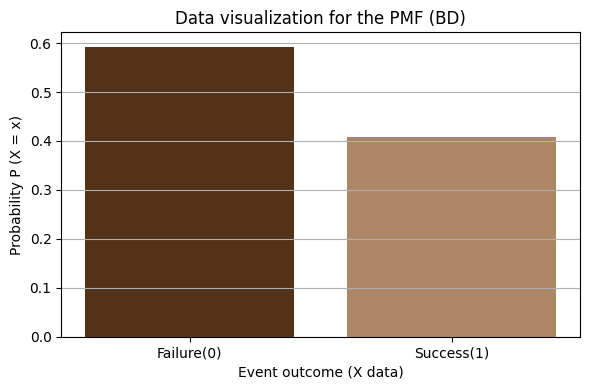

In [28]:

plt.figure(figsize =(6,4))
plt.bar(x_values,cal_pmf_values, color =["#543218","#AD8765"], tick_label = ["Failure(0)","Success(1)"])
plt.title("Data visualization for the PMF (BD)")
plt.xlabel("Event outcome (X data)")
plt.ylabel("Probability P (X = x)")
plt.grid(axis ="y")
plt.tight_layout()
plt.show()